In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
data = pd.read_csv("heart.csv")

In [173]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:>

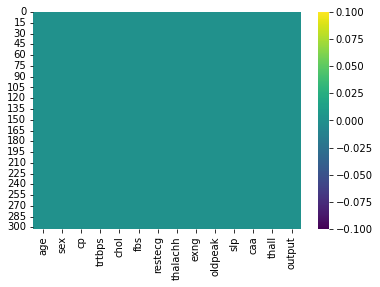

In [174]:
sns.heatmap(data.isnull(), cmap="viridis")

In [175]:
# Splitting Data
from sklearn.model_selection import train_test_split
X = data.drop("output", axis=1)
y = data["output"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
# Scaling Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [177]:
X_train.shape

(242, 13)

In [178]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25)
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(100, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(50, activation="relu"))
model.add(Dropout(0.5))

# Binary Classification
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy")

In [179]:
model.fit(x=X_train, y=y_train,
          validation_data=(X_test, y_test),
          epochs=600,
          callbacks=[early_stop])

Epoch 1/600
8/8 [==============================] - 1s 22ms/step - loss: 0.6825 - val_loss: 0.6566
Epoch 2/600
8/8 [==============================] - 0s 4ms/step - loss: 0.6679 - val_loss: 0.6319
Epoch 3/600
8/8 [==============================] - 0s 5ms/step - loss: 0.6450 - val_loss: 0.6082
Epoch 4/600
8/8 [==============================] - 0s 5ms/step - loss: 0.6402 - val_loss: 0.5858
Epoch 5/600
8/8 [==============================] - 0s 5ms/step - loss: 0.6222 - val_loss: 0.5613
Epoch 6/600
8/8 [==============================] - 0s 5ms/step - loss: 0.5806 - val_loss: 0.5345
Epoch 7/600
8/8 [==============================] - 0s 4ms/step - loss: 0.5671 - val_loss: 0.5070
Epoch 8/600
8/8 [==============================] - 0s 4ms/step - loss: 0.5383 - val_loss: 0.4838
Epoch 9/600
8/8 [==============================] - 0s 5ms/step - loss: 0.5391 - val_loss: 0.4593
Epoch 10/600
8/8 [==============================] - 0s 5ms/step - loss: 0.5034 - val_loss: 0.4405
Epoch 11/600
8/8 [==========

<AxesSubplot:>

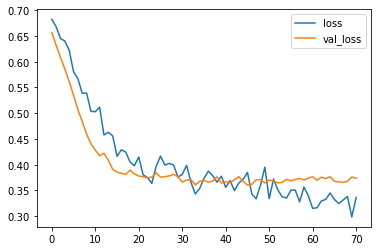

In [180]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [181]:
predictions = (model.predict(X_test) > 0.5)*1

2/2 [==============================] - 0s 2ms/step


In [182]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print()
print(classification_report(y_test, predictions))

[[25  4]
 [ 6 26]]

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

